# Convolutional Neural Networks

CCNs are typically used for image processing, but they can also be applied to time series data. When using a CNN for time series, the convolutional layers can help capture local patterns within the time series.

Let's adapt our script to use CNNs for the mental health dataset:

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('timeseries_data.csv')

# Extract features and target
features = data[['Therapy_Session', 'Group_Support_Meeting']].values
stress_level = data['Stress_Level'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
stress_level_scaled = scaler.fit_transform(stress_level)

# Prepare data
def create_dataset(X, Y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(Y)-look_back-1):
        a = np.concatenate([X[i:(i+look_back)], Y[i:(i+look_back)]], axis=1)
        dataX.append(a)
        dataY.append(Y[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
X, Y = create_dataset(features, stress_level_scaled, look_back)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)  # Reshape for CNN

# Create CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(look_back, 3, 1)),  # 3 features: 'Stress_Level', 'Therapy_Session', and 'Group_Support_Meeting'
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1)

# Predict
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict).flatten()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(data['Stress_Level'][3:-1].values, train_predict))
print(f"Train RMSE: {train_rmse}")

Epoch 1/100
96/96 [==============================] - 1s 1ms/step - loss: 0.0668
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 11/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 12/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 13/100
96/96 [=================

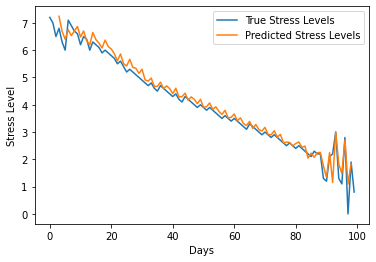

In [2]:
# Plot results
plt.plot(data['Stress_Level'].values, label='True Stress Levels')
plt.plot(np.arange(3, 99), train_predict, label='Predicted Stress Levels')
plt.xlabel('Days')
plt.ylabel('Stress Level')
plt.legend()
plt.show()